In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
pre_synaptic = pd.read_csv("pre_synaptic_cells.csv", index_col = 0)
pre_synaptic

,1.2009142857142858,1.1989714285714286,1.1970285714285713,1.1950857142857143,1.193142857142857,1.1912,1.189257142857143,1.1873142857142858,1.1853714285714285,1.1834285714285715,...,-0.18434285714285714,-0.18628571428571428,-0.18822857142857147,-0.19017142857142857,-0.1921142857142857,-0.1940571428571429,-0.19599999999999995,-0.19794285714285714,-0.19988571428571433,-0.20182857142857138
xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.188055,0.192641,0.201815,0.183468,0.146774,0.151361,0.165121,0.146774,0.110081,0.110081
xbc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.130981,0.123704,0.116427,0.123704,0.065490,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bc5t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bc5t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bc5t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bc5t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
post_synaptic = pd.read_csv("post_synaptic_cells.csv", index_col = 0)
post_synaptic

,1.2009142857142858,1.1989714285714286,1.1970285714285713,1.1950857142857143,1.193142857142857,1.1912,1.189257142857143,1.1873142857142858,1.1853714285714285,1.1834285714285715,...,-0.18434285714285714,-0.18628571428571428,-0.18822857142857147,-0.19017142857142857,-0.1921142857142857,-0.1940571428571429,-0.19599999999999995,-0.19794285714285714,-0.19988571428571433,-0.20182857142857138
2i,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
2i,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
2i,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
2i,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
2i,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
85,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
85,0.008990,0.062932,0.161825,0.206776,0.062932,0.242737,0.089903,0.017981,0.053942,0.071922,...,0.00899,0.00899,0.00899,0.00899,0.017981,0.00899,0.00899,0.00899,0.00899,0.00899
1ws,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000


In [4]:
# calculate the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(pre_synaptic, post_synaptic)
cosine_sim_matrix = (cosine_sim_matrix - np.mean(cosine_sim_matrix))/np.std(cosine_sim_matrix)
cosine_sim_matrix

array([[-0.73787448, -0.7865541 , -0.81372234, ...,  0.05394619,
        -0.80647623, -0.88752795],
       [-0.83530487, -0.84526492, -0.88482024, ..., -0.05610187,
        -0.87158998, -0.92370748],
       [-0.88585994, -0.89004045, -0.92961415, ..., -0.31873302,
        -0.92281557, -0.9431646 ],
       ...,
       [-0.66327312, -0.69054877, -0.73272361, ...,  0.68194368,
        -0.70213044, -0.84631231],
       [-0.67073871, -0.68045638, -0.72522941, ...,  0.49368844,
        -0.71569894, -0.84185276],
       [-0.56283908, -0.60039916, -0.64340656, ...,  0.88754946,
        -0.60253819, -0.76938553]])

In [5]:
corr_df = pd.DataFrame(cosine_sim_matrix, index=pre_synaptic.index)
corr_df.columns = post_synaptic.index
corr_df

,2i,2i,2i,2i,2i,2i,2i,2i,2i,2i,...,85,85,85,85,85,85,85,85,1ws,1ws
xbc,-0.737874,-0.786554,-0.813722,-0.919358,-0.894394,-0.848135,-0.897370,-0.942110,-0.858624,-0.887346,...,0.050497,0.255494,0.245426,0.002439,0.031594,0.106239,-0.280642,0.053946,-0.806476,-0.887528
xbc,-0.835305,-0.845265,-0.884820,-0.976806,-0.945505,-0.908410,-0.960170,-0.990107,-0.921150,-0.945289,...,-0.003942,0.080336,0.216040,-0.117357,0.026735,0.013808,-0.303120,-0.056102,-0.871590,-0.923707
xbc,-0.885860,-0.890040,-0.929614,-1.002708,-0.972677,-0.947769,-0.996342,-1.008603,-0.948250,-0.974680,...,-0.282490,-0.229581,-0.050837,-0.374778,-0.297742,-0.279180,-0.497469,-0.318733,-0.922816,-0.943165
xbc,-0.803021,-0.839861,-0.884901,-0.970735,-0.936763,-0.898113,-0.940236,-0.980585,-0.907479,-0.930812,...,-0.022285,0.088447,0.163224,-0.068882,-0.028267,-0.004277,-0.354862,-0.058672,-0.850522,-0.925568
xbc,-0.788070,-0.807480,-0.847013,-0.942436,-0.903843,-0.872710,-0.912207,-0.953388,-0.876466,-0.894814,...,-0.030193,0.098769,0.208561,-0.119799,0.074407,0.042110,-0.335787,-0.024032,-0.846002,-0.897963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bc5t,-0.648383,-0.661339,-0.714010,-0.835670,-0.786868,-0.721469,-0.769967,-0.844104,-0.761541,-0.766549,...,0.730307,0.699297,0.794144,0.363026,0.860310,0.696299,0.160165,0.470873,-0.724637,-0.839182
bc5t,-0.654820,-0.688059,-0.745262,-0.892633,-0.848077,-0.765889,-0.798124,-0.911439,-0.820807,-0.813924,...,1.002379,1.027042,1.027475,0.568717,1.316849,1.053573,0.296088,0.721121,-0.694370,-0.839167
bc5t,-0.663273,-0.690549,-0.732724,-0.880371,-0.838312,-0.773148,-0.804153,-0.908090,-0.815065,-0.808232,...,0.849907,0.927509,0.912226,0.542591,1.217649,0.922971,0.224232,0.681944,-0.702130,-0.846312
bc5t,-0.670739,-0.680456,-0.725229,-0.854206,-0.829847,-0.740789,-0.808328,-0.879552,-0.794453,-0.811713,...,0.768203,0.733999,0.807240,0.439645,0.881506,0.779593,0.205044,0.493688,-0.715699,-0.841853


In [6]:
corr_df = corr_df.rename(columns={'82n': '82n/wo', '82wo': '82n/wo', '7iv': '7iv/r/d', '7ir': '7iv/r/d', '7id': '7iv/r/d'})
corr_df

,2i,2i,2i,2i,2i,2i,2i,2i,2i,2i,...,85,85,85,85,85,85,85,85,1ws,1ws
xbc,-0.737874,-0.786554,-0.813722,-0.919358,-0.894394,-0.848135,-0.897370,-0.942110,-0.858624,-0.887346,...,0.050497,0.255494,0.245426,0.002439,0.031594,0.106239,-0.280642,0.053946,-0.806476,-0.887528
xbc,-0.835305,-0.845265,-0.884820,-0.976806,-0.945505,-0.908410,-0.960170,-0.990107,-0.921150,-0.945289,...,-0.003942,0.080336,0.216040,-0.117357,0.026735,0.013808,-0.303120,-0.056102,-0.871590,-0.923707
xbc,-0.885860,-0.890040,-0.929614,-1.002708,-0.972677,-0.947769,-0.996342,-1.008603,-0.948250,-0.974680,...,-0.282490,-0.229581,-0.050837,-0.374778,-0.297742,-0.279180,-0.497469,-0.318733,-0.922816,-0.943165
xbc,-0.803021,-0.839861,-0.884901,-0.970735,-0.936763,-0.898113,-0.940236,-0.980585,-0.907479,-0.930812,...,-0.022285,0.088447,0.163224,-0.068882,-0.028267,-0.004277,-0.354862,-0.058672,-0.850522,-0.925568
xbc,-0.788070,-0.807480,-0.847013,-0.942436,-0.903843,-0.872710,-0.912207,-0.953388,-0.876466,-0.894814,...,-0.030193,0.098769,0.208561,-0.119799,0.074407,0.042110,-0.335787,-0.024032,-0.846002,-0.897963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bc5t,-0.648383,-0.661339,-0.714010,-0.835670,-0.786868,-0.721469,-0.769967,-0.844104,-0.761541,-0.766549,...,0.730307,0.699297,0.794144,0.363026,0.860310,0.696299,0.160165,0.470873,-0.724637,-0.839182
bc5t,-0.654820,-0.688059,-0.745262,-0.892633,-0.848077,-0.765889,-0.798124,-0.911439,-0.820807,-0.813924,...,1.002379,1.027042,1.027475,0.568717,1.316849,1.053573,0.296088,0.721121,-0.694370,-0.839167
bc5t,-0.663273,-0.690549,-0.732724,-0.880371,-0.838312,-0.773148,-0.804153,-0.908090,-0.815065,-0.808232,...,0.849907,0.927509,0.912226,0.542591,1.217649,0.922971,0.224232,0.681944,-0.702130,-0.846312
bc5t,-0.670739,-0.680456,-0.725229,-0.854206,-0.829847,-0.740789,-0.808328,-0.879552,-0.794453,-0.811713,...,0.768203,0.733999,0.807240,0.439645,0.881506,0.779593,0.205044,0.493688,-0.715699,-0.841853


In [7]:
df = pd.read_csv("RGC_type_correspondence_combined.csv")
df

,Goetz et al. (2022) Type,Bae et al. (2018) Eyewire type,Tran et al. (2019) Cluster
0,ON sus alpha,8w,C43
1,OFFhOS,2aw,C9
2,OFFvOS,2aw,C5
3,ON tr SmRF,6sn,C30
4,OFF tr alpha,4ow,C45
5,OFF tr SmRF,4i,C21
6,ONhOS SmRF,82wi,C27
7,ONhOS LgRF,82n/wo,C36
8,ONvOS SmRF,72,C38
9,"ON DS sus DN, T, V",7iv/r/d,C10


In [8]:
# Initialize an empty dictionary
rgc_map = {}

# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Extract the value and key from the row
    value = row['Bae et al. (2018) Eyewire type']
    key = row['Tran et al. (2019) Cluster']
    
    # Extract the number from the 'key' column
    key_number = int(key[1:])
    
    # Adjust the key number by subtracting 1
    adjusted_key = key_number - 1
    
    # Add the key-value pair to the dictionary
    rgc_map[adjusted_key] = value

# Print the resulting dictionary
print(rgc_map)

{42: '8w', 8: '2aw', 4: '2aw', 29: '6sn', 44: '4ow', 20: '4i', 26: '82wi', 35: '82n/wo', 37: '72', 9: '7iv/r/d', 15: '37v', 23: '37r', 12: '5si', 5: '5so', 1: '5ti', 10: '51', 2: '63', 13: '73', 17: '3i', 24: '2o', 25: '27', 30: '9w', 41: '1wt', 11: '37c', 3: '2an', 40: '6sw'}


In [9]:
bc_map = {
    0:"bc1",
    1:"bc1",
    2:"bc2",
    3:"bc3a",
    4:"bc3b",
    5:"bc4",
    6:"bc5i",
    7:"bc5o",
    8:"bc5t",
    9:"xbc",
    10:"bc6",
    11:"bc7",
    12:"bc8/9",
    13:"bc8/9",
}

In [10]:
# initialize empty dataframes for mean and variance
mean_df = pd.DataFrame()
var_df = pd.DataFrame()

# loop over each unique index value and column name
for index in corr_df.index.unique():
    for col_name in corr_df.columns.unique():
        # select sub dataframe based on index value and column name
        sub_df = corr_df.loc[index, col_name]
        
        # calculate mean and variance
        sub_mean = sub_df.values.flatten().mean()
        sub_var = sub_df.values.flatten().var()
        
        # add mean and variance to respective dataframes
        mean_df.loc[index, col_name] = sub_mean
        var_df.loc[index, col_name] = sub_var

In [11]:
mean_df_selected = mean_df[mean_df.index.isin(bc_map.values())]
mean_df_selected_T = mean_df_selected.T
mean_df_selected_T_selected = mean_df_selected_T[mean_df_selected_T.index.isin(rgc_map.values())]
mean_df = mean_df_selected_T_selected.T
mean_df = mean_df.sort_index().sort_index(axis=1)
mean_df

,1wt,27,2an,2aw,2o,37c,37r,37v,3i,4i,...,63,6sn,6sw,72,73,7iv/r/d,82n/wo,82wi,8w,9w
bc1,1.765638,2.078257,2.253563,2.324735,2.321309,-0.468666,-0.352261,-0.451977,1.786638,-0.879778,...,-0.491603,-1.136757,-1.138290,0.398370,0.182421,-1.089168,0.010274,-0.385499,-1.140229,-1.140229
bc2,2.214331,1.960025,2.299652,2.257118,2.137831,0.267909,0.426871,0.304961,2.165173,-0.470123,...,0.187163,-1.133315,-1.137492,0.227581,0.212052,-1.023263,-0.028737,-0.465328,-1.140229,-1.140229
bc3a,0.014845,-0.062604,0.485903,-0.158017,-0.393949,0.636029,0.717180,0.710334,1.160862,2.102363,...,1.387802,-1.055766,-1.100811,-0.607863,-0.046697,-0.926425,-0.709379,-0.921696,-1.140229,-1.140229
bc3b,0.118872,0.046328,0.584665,-0.036917,-0.257395,0.496797,0.589220,0.566447,1.188170,2.007967,...,1.291898,-1.051465,-1.098341,-0.561795,-0.025702,-0.937863,-0.670452,-0.894768,-1.140229,-1.140229
bc4,0.471432,0.402518,0.944175,0.355128,0.094079,0.722966,0.836894,0.792993,1.542472,1.828827,...,1.413330,-1.039303,-1.086604,-0.405010,0.114936,-0.923305,-0.547103,-0.821611,-1.140229,-1.140229
bc5i,-0.851685,-0.546839,-0.786281,-0.813143,-0.819216,0.181085,0.035943,0.098772,-0.710858,-0.713936,...,1.268667,2.580273,2.447052,-0.382388,0.470584,0.932348,-0.707757,-0.867421,-1.073277,-1.121080
bc5o,-0.855314,-0.620546,-0.749512,-0.814676,-0.796450,-0.250678,-0.351711,-0.307808,-0.694386,-0.528597,...,1.280664,2.419237,2.315047,-0.571565,0.244686,0.137725,-0.703260,-0.919451,-1.101646,-1.132977
bc5t,-0.856793,-0.574459,-0.723707,-0.815525,-0.791575,0.216665,0.091783,0.152937,-0.676352,-0.404399,...,1.242985,1.898121,1.609563,-0.392948,0.529689,0.874217,-0.650643,-0.878301,-1.087786,-1.128714
bc6,-0.573996,0.106176,-0.521340,-0.545817,-0.597708,-0.468275,-0.486316,-0.457389,-0.457782,-0.569300,...,-0.036143,0.094611,0.195177,0.638912,0.835000,-0.116227,1.768752,2.018341,1.953503,1.739948
bc7,-0.927882,0.295581,-0.885757,-0.858043,-0.897468,-0.434554,-0.463943,-0.389778,-0.747088,-0.896415,...,-0.591907,-0.575201,-0.337457,2.343511,2.042274,0.736015,0.762473,1.175010,0.019430,-0.278273


In [12]:
var_df_selected = var_df[var_df.index.isin(bc_map.values())]
var_df_selected_T = var_df_selected.T
var_df_selected_T_selected = var_df_selected_T[var_df_selected_T.index.isin(rgc_map.values())]
var_df = var_df_selected_T_selected.T
var_df = var_df.sort_index().sort_index(axis=1)
var_df

,1wt,27,2an,2aw,2o,37c,37r,37v,3i,4i,...,63,6sn,6sw,72,73,7iv/r/d,82n/wo,82wi,8w,9w
bc1,0.262515,0.117607,0.086059,0.099480,0.172097,0.390568,0.458292,0.412425,0.247573,0.055498,...,0.287524,0.000189,0.000095,0.116537,0.130610,0.004338,0.743285,0.064228,0.000000e+00,0.000000e+00
bc2,0.163541,0.106629,0.048782,0.059587,0.080848,0.210051,0.239489,0.227440,0.139842,0.116481,...,0.181420,0.000129,0.000023,0.082355,0.089567,0.005642,0.591018,0.066176,4.930381e-32,4.930381e-32
bc3a,0.191508,0.128247,0.190699,0.083698,0.039739,0.180312,0.188926,0.173748,0.179818,0.083064,...,0.083944,0.003629,0.001231,0.014453,0.036727,0.008706,0.043335,0.005533,1.972152e-31,4.930381e-32
bc3b,0.238986,0.167240,0.225348,0.133667,0.082839,0.235352,0.258316,0.236713,0.243046,0.096520,...,0.100941,0.003005,0.000803,0.023382,0.039116,0.008429,0.062087,0.008678,0.000000e+00,0.000000e+00
bc4,0.292052,0.227638,0.236935,0.194213,0.155808,0.153300,0.166924,0.152572,0.171941,0.172759,...,0.060316,0.004569,0.001793,0.037700,0.046907,0.009183,0.112866,0.016502,4.930381e-32,0.000000e+00
bc5i,0.001518,0.011356,0.004695,0.003952,0.003016,0.202696,0.098863,0.106270,0.014083,0.014954,...,0.071906,0.031017,0.058114,0.023171,0.098387,0.179648,0.010175,0.007407,3.106617e-03,9.485854e-04
bc5o,0.002316,0.014787,0.010185,0.005436,0.005691,0.137949,0.073977,0.082333,0.012292,0.037024,...,0.070846,0.130723,0.181542,0.026315,0.091061,0.222208,0.013165,0.005119,1.353502e-03,9.521732e-05
bc5t,0.003805,0.020931,0.013354,0.006192,0.006157,0.190928,0.083611,0.091456,0.012074,0.040215,...,0.070415,0.179396,0.226446,0.041503,0.098841,0.169844,0.014299,0.008841,1.865488e-03,2.073306e-04
bc6,0.008683,0.101142,0.011034,0.012416,0.009207,0.048369,0.026473,0.034392,0.015313,0.020484,...,0.163176,0.406801,0.426805,0.154200,0.124089,0.103566,0.334269,0.164089,2.251770e-01,3.151500e-01
bc7,0.001046,0.269108,0.002701,0.005829,0.003038,0.082982,0.048718,0.070516,0.014135,0.003819,...,0.026263,0.033451,0.048632,0.037852,0.040517,0.165149,0.615270,0.338073,2.037415e-01,8.625663e-02


In [13]:
mean_df.to_csv('connection_matrix_mean.csv')
var_df.to_csv('connection_matrix_var.csv')

In [14]:
mean_df = mean_df.rename(index={'xbc': 'bc5xbc'})
mean_df = mean_df.sort_index().sort_index(axis=1)
var_df = var_df.rename(index={'xbc': 'bc5xbc'})
var_df = var_df.sort_index().sort_index(axis=1)

<AxesSubplot:>

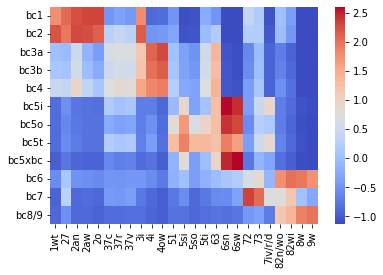

In [15]:
sns.heatmap(mean_df, cmap='coolwarm')

<AxesSubplot:>

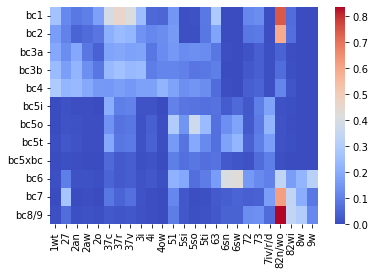

In [16]:
sns.heatmap(var_df, cmap='coolwarm')